# Exploring the data sets

In this file I explore the red and white wine data sets using the commands from the seaborn tutorial

Date: November 1, 2020


I will start by looking at the data frame and the types of data in the columns, look for any missing values, and find how many duplicates there are.

## Red Wine Data Set

### Overview of Data

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

red_wine_df = pd.read_csv("../../data/raw/winequality-red.csv", sep=";")

red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
red_wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
red_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB



Good, it looks like there are no missing values in the red wine dataframe and the value types are correct!


In [21]:
# generate count statistics of duplicate entries
# code from https://towardsdatascience.com/exploratory-data-analysis-eda-a-practical-guide-and-template-for-structured-data-abfbf3ee3bd9
if len(red_wine_df[red_wine_df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(red_wine_df[red_wine_df.duplicated()]))
    print(red_wine_df[red_wine_df.duplicated(keep=False)].sort_values(by=list(red_wine_df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


So there are 240 entries that should be removed with method chaining. We can also shorten some of the variable names. 


In [21]:
import sys, os
sys.path.insert(0, os.path.abspath('..'))
from scripts.project_functions import *

red_wine_df = load_and_process("../../data/raw/winequality-red.csv", ";")
red_wine_df.head()

,fa,va,ca,rs,chlorides,fsd,tsd,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


---

### Exploring Relationships

Now I'll start looking at relationships between variables to find the variables of interest. 

I have the following research questions:

1. Which variable is most useful in determining the quality of a wine?
2. What properties are tied closest to a wine having a high alcohol percentage?
3. Does higher residual sugar indicate a lower quality wine?

I am specifically interested in question 3 since sweet wines are often not thought of as highly within the wine community. 

I'll create a pandas profile to look at the variables in the data set.

In [7]:
from pandas_profiling import ProfileReport

prof = ProfileReport(red_wine_df)
prof.to_file(output_file='red_wine_pandas_profile.html')

Notes on the pandas profile:
- The variables that have the strongest correlation are: pH and fixed acidity (-0.69), fixed acidity and citric acid (0.67), density and fixed acidity (0.67), alcohol and density (-0.5), citric acid and pH (-0.54), free sulfur dioxide and total sulfur dioxide (0.67) (these number are taken from the heat map below)
    - the most interesting of these correlations is alcohol and density, so I will look at this more
    - we are most concerned with the quality variable, and it is correlated most with volatile acidity and alcohol
- There are outliers in every category other than density and quality
- Most wines have an average quality, ranging from 5-6, but a few have very low quality (3-4) and high quality (7-8)


<AxesSubplot:>

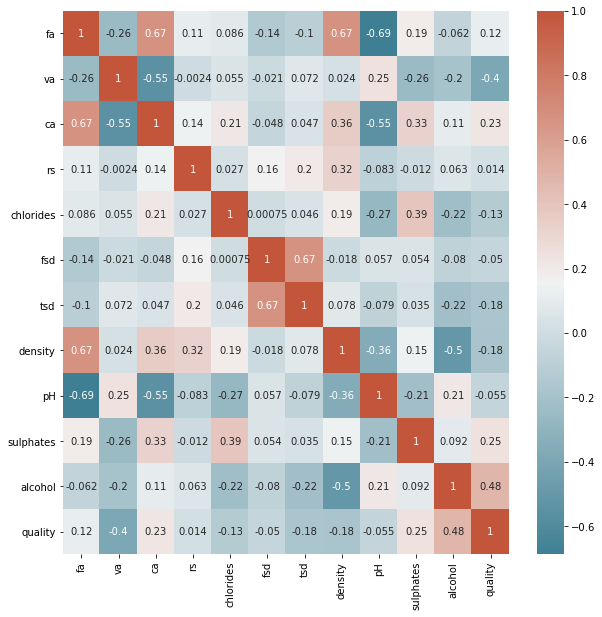

In [22]:
corr = red_wine_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns, 
            annot=True, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

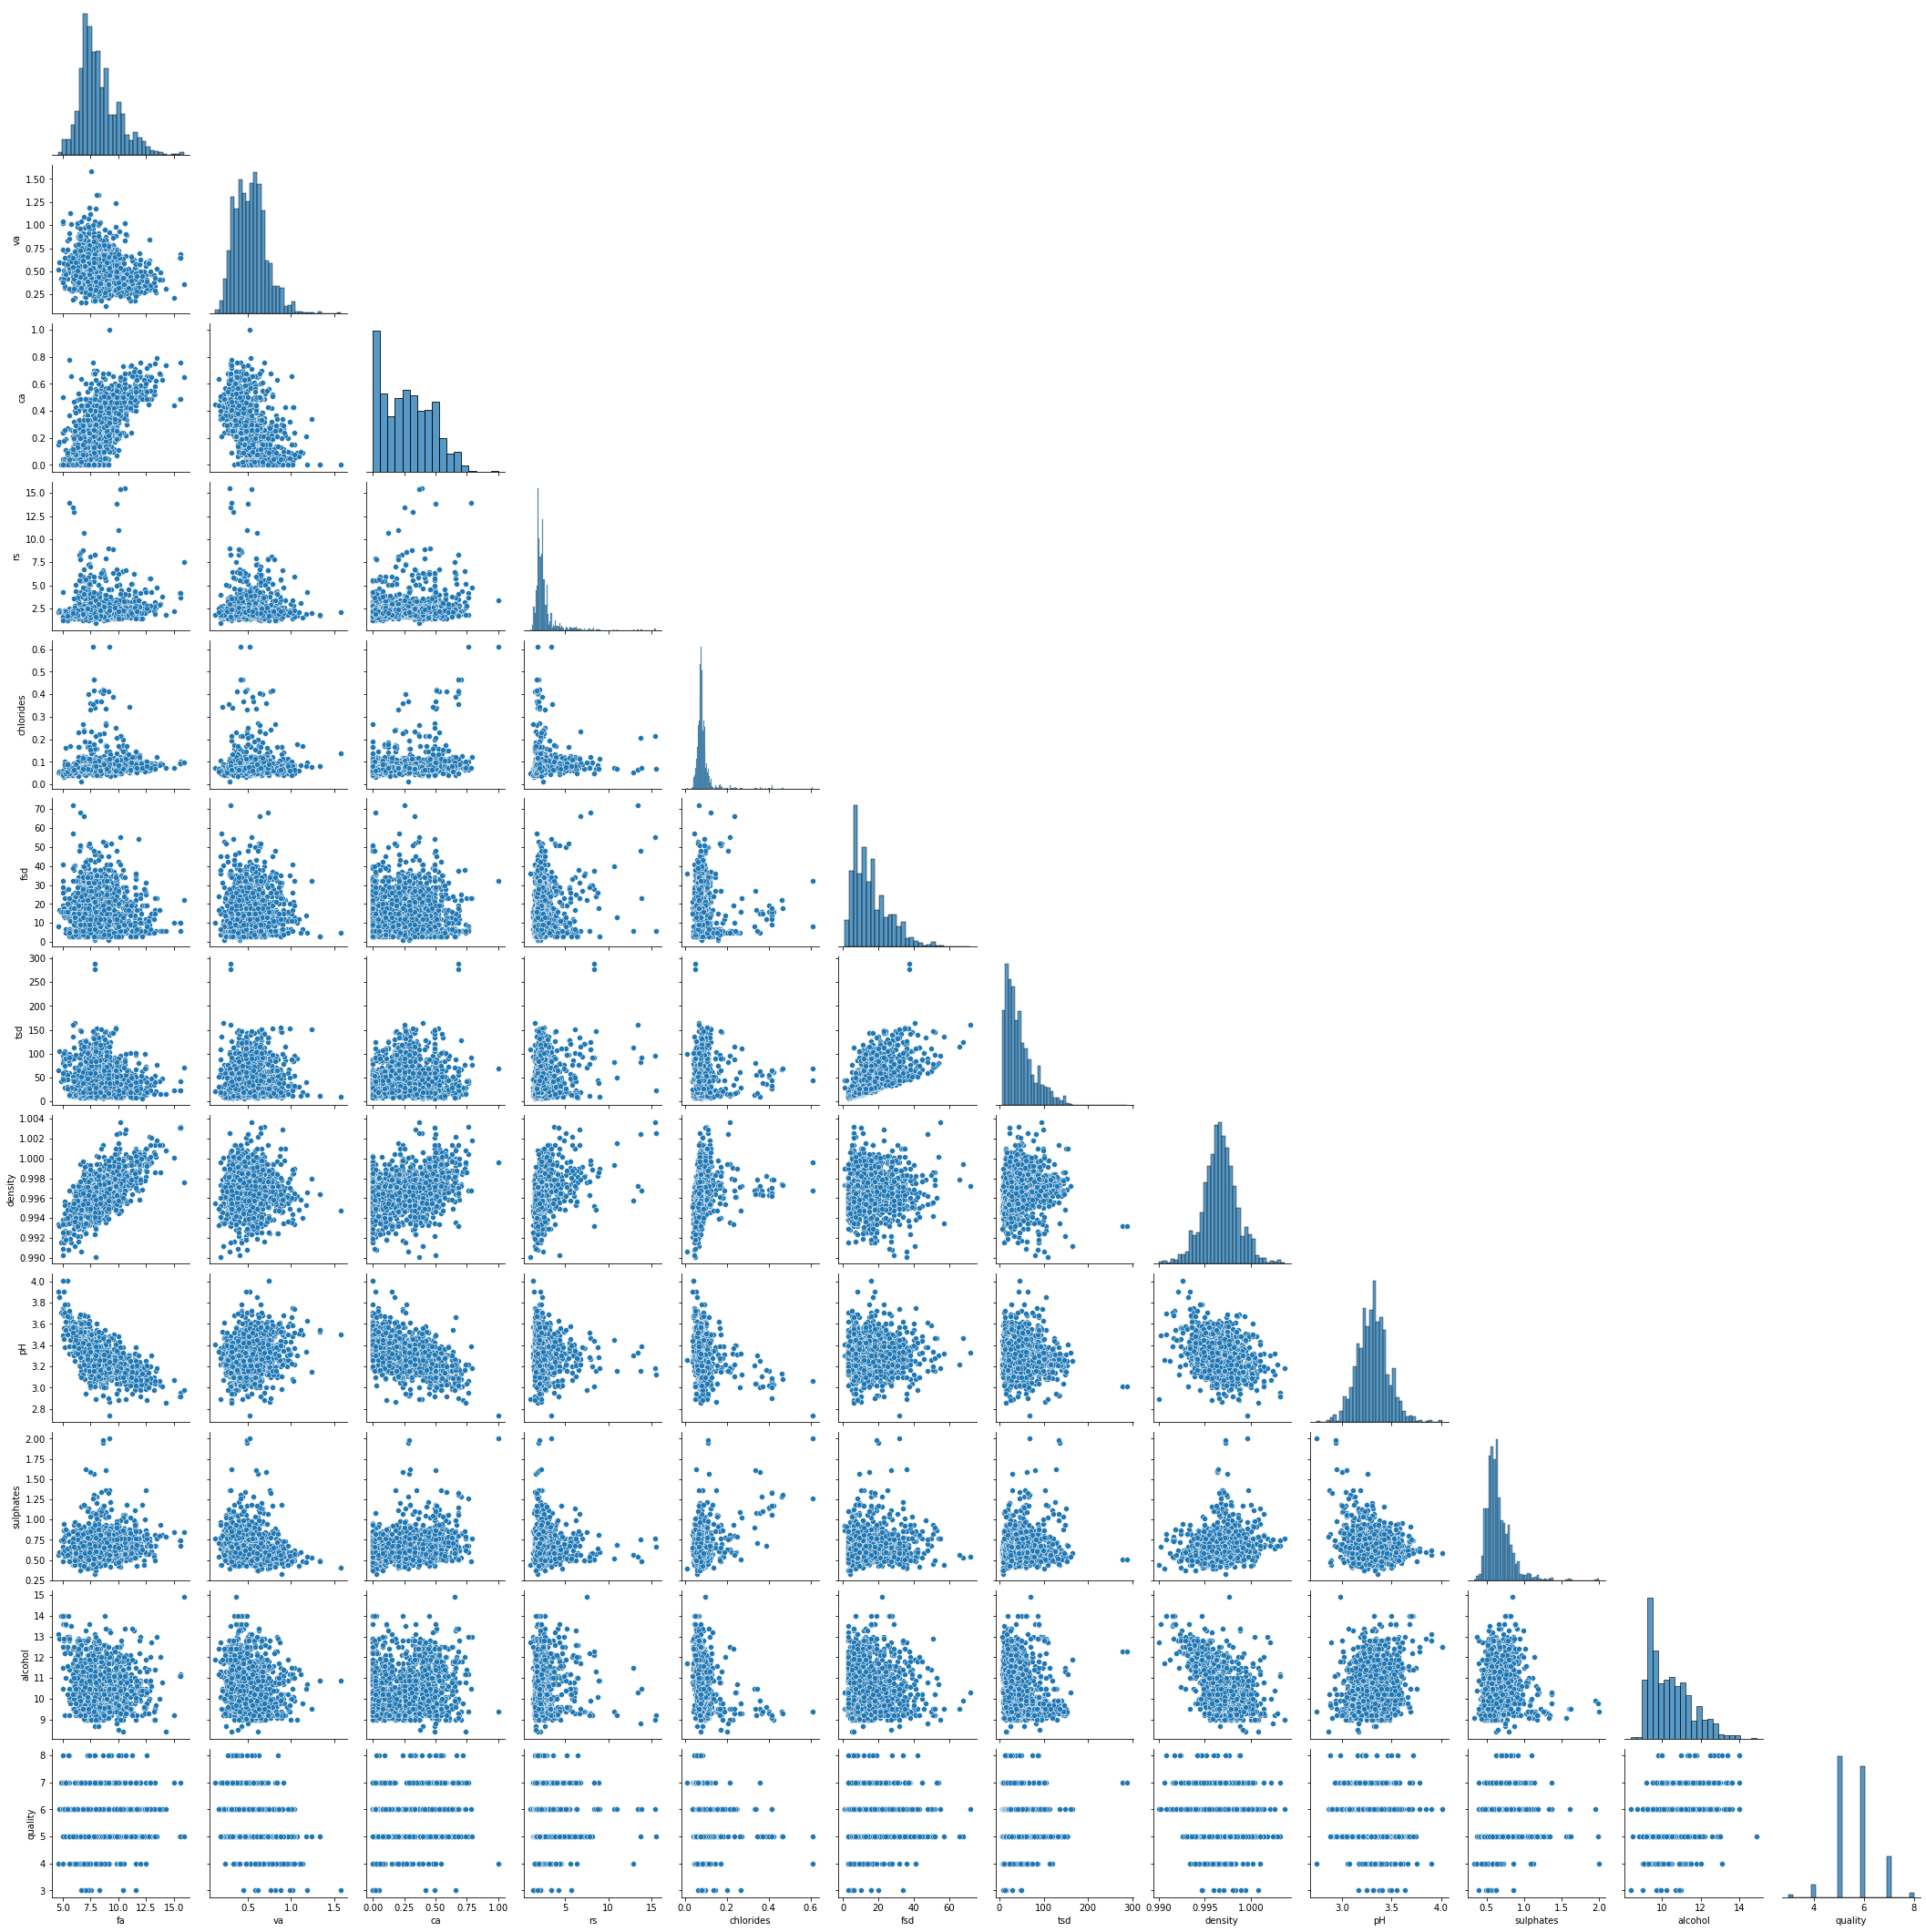

In [10]:
sns.pairplot(red_wine_df, corner=True)

These pair plots confirm that the most distinct relationships appear to be between the density and fixed acidity, total sulfur dioxide and free sulfur dioxide, alcohol and density. The quality variable is difficult to visualize with these plots.

Also note that the distribution for each of the characteristics has a large peak around the mean values. Ideally to be able to study the relationships between characteristics the distributions would be uniform. The congregation of values leads to large clusters in the pair plots and makes it difficult to see possible correlations.

In the code blocks below I plot the some numerical variables against the quality variable, which can be seen as categorical. (The code for the grey violin plot was taken from: https://stackoverflow.com/questions/55797760/seaborn-stripplot-with-violin-plot-bars-in-front-of-points .)

In [41]:
quality_groups = red_wine_df.groupby('quality')

Text(0, 0.5, 'Residual Sugar')

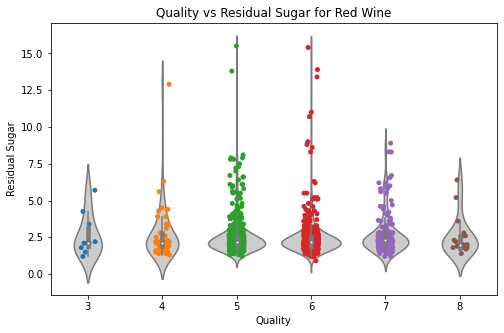

In [37]:
plt.figure(figsize=(8,5))

sns.violinplot(x="quality", y="rs", data=red_wine_df, color="0.8")
sns.stripplot(x='quality', y='rs', data=red_wine_df, jitter=True, zorder=1)

plt.title("Quality vs Residual Sugar for Red Wine")
plt.xlabel("Quality")
plt.ylabel("Residual Sugar")

In [42]:
quality_groups['rs'].agg(np.mean)

quality
3    2.635000
4    2.694340
5    2.509532
6    2.457290
7    2.716766
8    2.576471
Name: rs, dtype: float64

So both low quality wines and high quality wines have lower amounts of residual sugar. Whereas the more avergae wines tend to have higher residual sugars, but these are mostly outliers. Most wines in this data set have lower residual sugar, as seen by the dense placement of dots in the bottom half of each strip. The mean residual sugar for each group is also very similar.

Text(0, 0.5, 'Volatile Acidity')

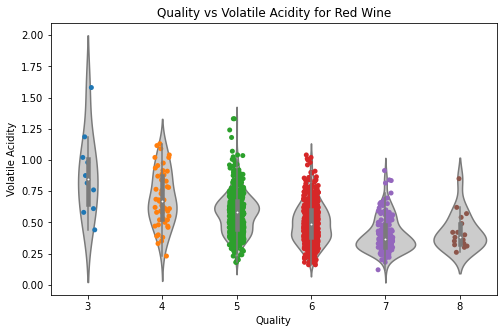

In [31]:
plt.figure(figsize=(8,5))

sns.violinplot(x="quality", y="va", data=red_wine_df, color="0.8")
sns.stripplot(x='quality', y='va', data=red_wine_df, jitter=True, zorder=1)

plt.title("Quality vs Volatile Acidity for Red Wine")
plt.xlabel("Quality")
plt.ylabel("Volatile Acidity")

In [43]:
quality_groups['va'].agg(np.mean)

quality
3    0.884500
4    0.693962
5    0.578596
6    0.496084
7    0.403653
8    0.427647
Name: va, dtype: float64

The low quality wines have higher volatile acidity.

Text(0, 0.5, 'Chlorides')

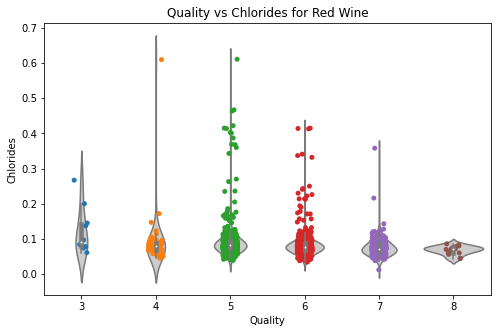

In [33]:
plt.figure(figsize=(8,5))

sns.violinplot(x="quality", y="chlorides", data=red_wine_df, color="0.8")
sns.stripplot(x='quality', y='chlorides', data=red_wine_df, jitter=True, zorder=1)

plt.title("Quality vs Chlorides for Red Wine")
plt.xlabel("Quality")
plt.ylabel("Chlorides")

In [44]:
quality_groups['chlorides'].agg(np.mean)

quality
3    0.122500
4    0.090679
5    0.093971
6    0.085075
7    0.076832
8    0.068353
Name: chlorides, dtype: float64

The high quality wines all have low amount of chlorides.

Text(0, 0.5, 'Density')

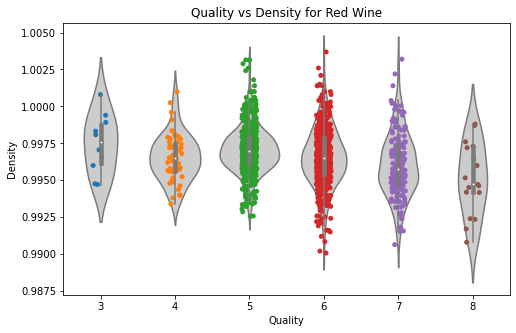

In [34]:
plt.figure(figsize=(8,5))

sns.violinplot(x="quality", y="density", data=red_wine_df, color="0.8")
sns.stripplot(x='quality', y='density', data=red_wine_df, jitter=True, zorder=1)

plt.title("Quality vs Density for Red Wine")
plt.xlabel("Quality")
plt.ylabel("Density")

In [45]:
quality_groups['density'].agg(np.mean)

quality
3    0.997464
4    0.996542
5    0.997082
6    0.996565
7    0.996051
8    0.995095
Name: density, dtype: float64

Low quality wines seem to have higher densities in the violin/stripplot, but the means for each quality group are about the same. Wines with a quality of 8 have the lowest density, but only by 0.001.

Text(0, 0.5, 'pH')

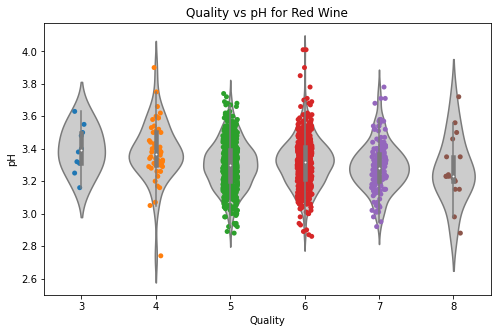

In [36]:
plt.figure(figsize=(8,5))

sns.violinplot(x="quality", y="pH", data=red_wine_df, color="0.8")
sns.stripplot(x='quality', y='pH', data=red_wine_df, jitter=True, zorder=1)

plt.title("Quality vs pH for Red Wine")
plt.xlabel("Quality")
plt.ylabel("pH")

In [46]:
quality_groups['pH'].agg(np.mean)

quality
3    3.398000
4    3.381509
5    3.300815
6    3.318000
7    3.290060
8    3.274118
Name: pH, dtype: float64

Text(0, 0.5, 'Alcohol')

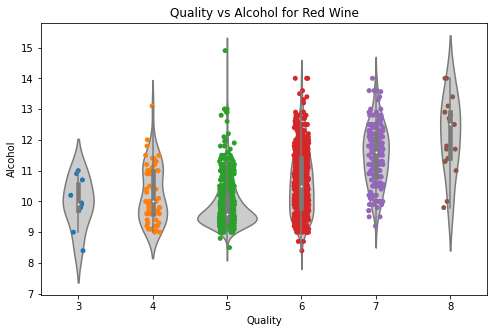

In [49]:
plt.figure(figsize=(8,5))

sns.violinplot(x="quality", y="alcohol", data=red_wine_df, color="0.8")
sns.stripplot(x='quality', y='alcohol', data=red_wine_df, jitter=True, zorder=1)

plt.title("Quality vs Alcohol for Red Wine")
plt.xlabel("Quality")
plt.ylabel("Alcohol")

In [48]:
quality_groups['alcohol'].agg(np.mean)

quality
3     9.955000
4    10.265094
5     9.888562
6    10.658879
7    11.491118
8    12.158824
Name: alcohol, dtype: float64

It appears that there is a positive correlation between alcohol percentage and quality.

Now I'll plot alcohol versus density to look at the relationship between the two variables.

<Figure size 576x576 with 0 Axes>

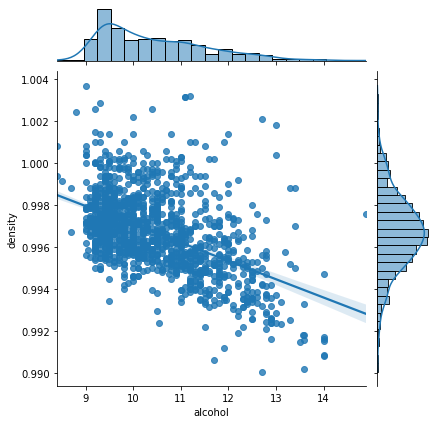

In [50]:
plt.figure(figsize=(8,8))

sns.jointplot(x="alcohol", y="density", data=red_wine_df, kind='reg')

So to answer these research questions:

1. Which variable is most useful in determining the quality of a wine?
    - It appears that high quality wines all have low amounts of chlorides. Higher quality wines also have higher alcohol percentages, specificially wines with a quality of 6 or higher. The lower the volatile acidity the higher the quality.
2. What properties are tied closest to a wine having a high alcohol percentage?
    - As mentioned above, high quality wine has more alcohol. Wines with lower densities also have a higher alcohol percentage. The wines with the lowest density also have the lowest densities, so there is some overlap here.
3. Does higher residual sugar indicate a lower quality wine?
    - Not necessarily. It looks like average wines have higher amounts residual sugar, but there are also more average quality wines in this data set, so this is not a fair comparison.

---